# Predicting House Prices in California with `LinearRegression()`

In this lab you will start inspect, analyze, visualize house price data from different districts in California, US. After having performed analysis, EDA and some feature engineering, you will build your own `LinearRegression()`  with `SkLearn`. 

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Part 1 - Inspection and Cleaning


#### Import and Inspect your data

Read the `housing.csv` file and make use of some methods to understand your data better. Below is an explanation of the features you are going to work with:

1. **longitude:**  geographical coordinate, east to west position of district
2. **latitude:**  geographical coordinate, north to south position of district
3. **housing_median_age:** the median age of houses in district
4. **total_rooms** Sum of all rooms in district
5. **total_bedrooms** Sum of all bedrooms in district
6. **population:** total population in district
7. **households:** total households in district
8. **median_income:** median household income in district 
9. **median_house_value:** median house value in district
10. **ocean_proximity:** District´s proximity to the ocean

In [33]:
# 2. Load the housing data
df = pd.read_csv(r'C:\Users\User\Desktop\AI_Lab\WK2-Labs\lab-ml-and-linear-regression\data\housing.csv')

In [6]:
# 3. Display first few rows
print("🔹 First 5 rows of the dataset:")
print(df.head())

🔹 First 5 rows of the dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [7]:
# 4. Get basic information about the dataset
print("\n🔹 Dataset Info:")
print(df.info())


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [8]:
# 5. Descriptive statistics for numerical features
print("\n🔹 Summary Statistics:")
print(df.describe())



🔹 Summary Statistics:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900 

In [9]:
# 6. Check for unique values in categorical column
print("\n🔹 Unique values in 'ocean_proximity':")
print(df['ocean_proximity'].value_counts())


🔹 Unique values in 'ocean_proximity':
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


#### Histograms
Make histograms of all your numeric columns in order to get a good understanding of the distribution of your data points. What do you see?

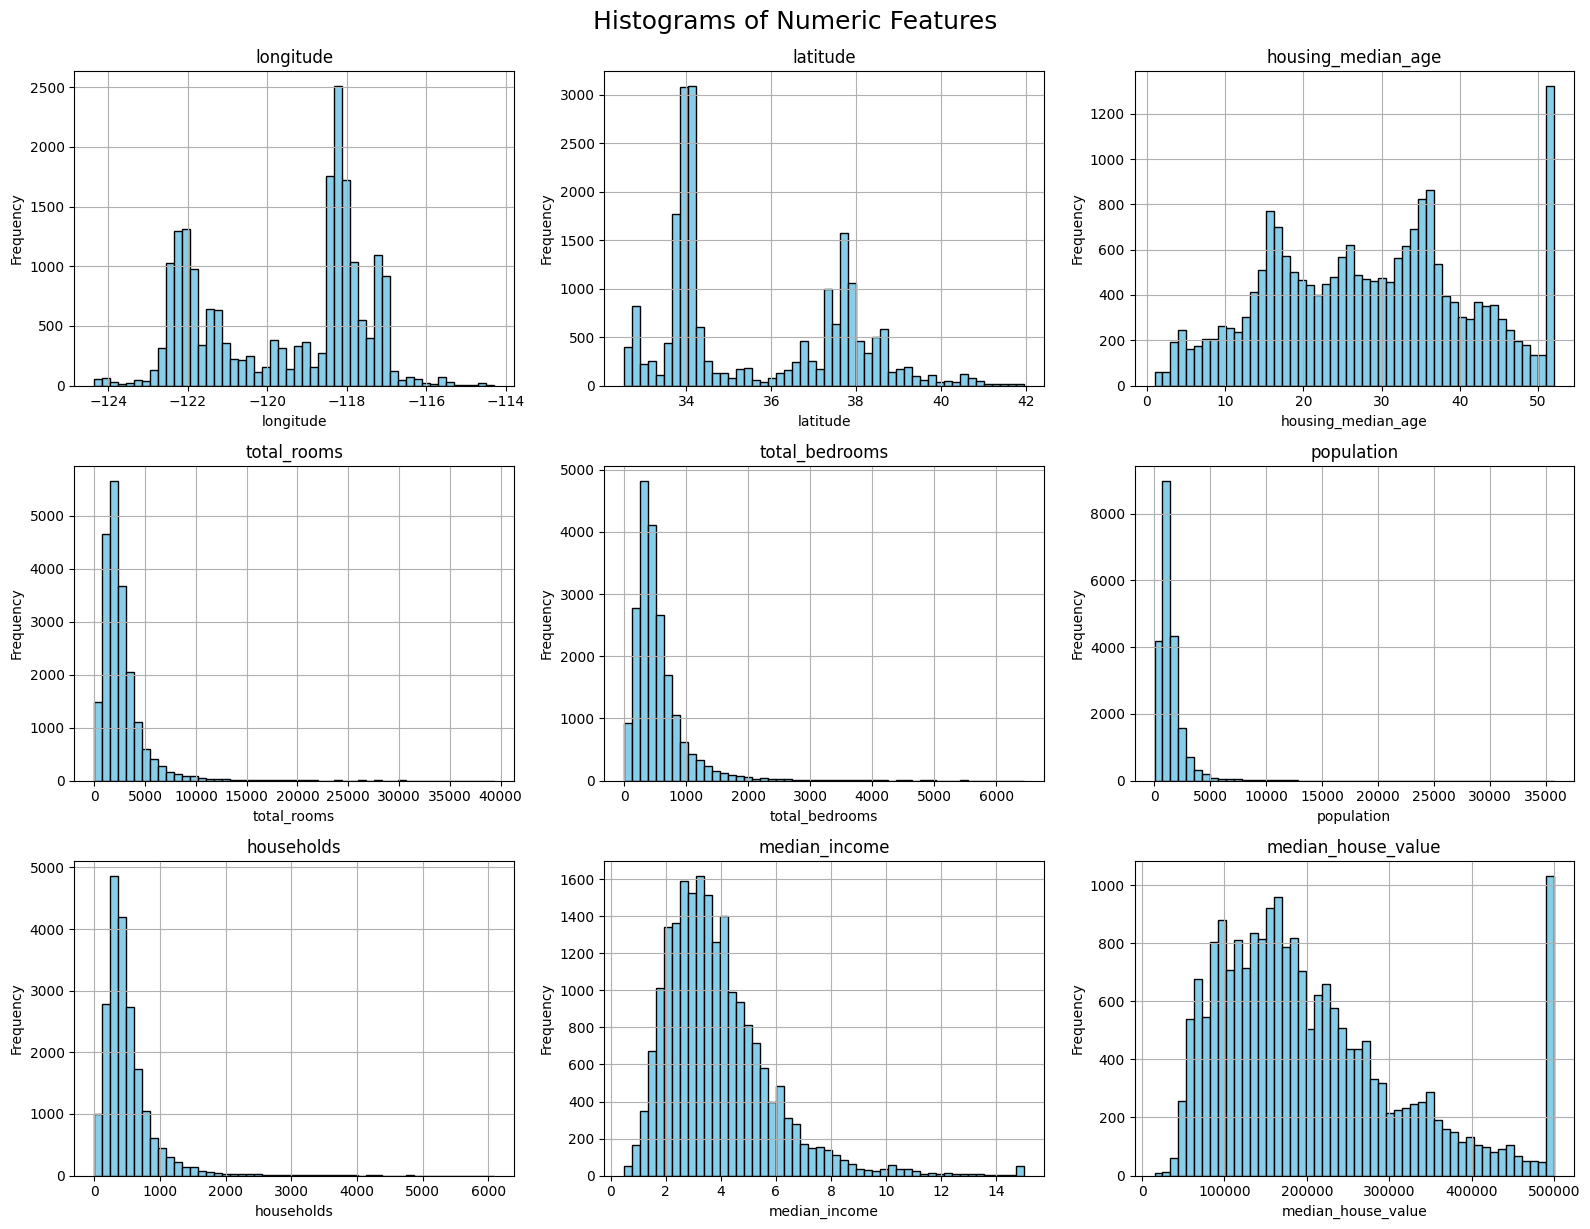

In [10]:
# Select numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the plot grid
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    df[col].hist(bins=50, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.suptitle('Histograms of Numeric Features', fontsize=18, y=1.02)
plt.show()

#### Let's create some features a tidy up our data

1. Locate your NaN values and make a decision on how to handle them. Drop, fill with mean, or something else, it is entirely up to you. 

In [11]:
# Check missing values
print("🔍 Missing values per column:")
print(df.isnull().sum())



🔍 Missing values per column:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [12]:
# Handle missing values in 'total_bedrooms'
# Strategy: Fill NaNs with the median of the column

median_bedrooms = df['total_bedrooms'].median()

df['total_bedrooms'].fillna(median_bedrooms, inplace=True)

# Confirm no more NaNs
print("\n✅ Missing values after imputation:")
print(df.isnull().sum())


✅ Missing values after imputation:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_9564\1492000948.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(median_bedrooms, inplace=True)


2. Create three new columns by using simple arithmetic operations. Create one column with "rooms per household", one with "population per household",  and one with "bedrooms per room".

In [13]:
# Create new features
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['population_per_household'] = df['population'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

In [14]:
# Display the first few rows to verify new features
print("✅ First 5 rows with new features:")
print(df[['rooms_per_household', 'population_per_household', 'bedrooms_per_room']].head())

✅ First 5 rows with new features:
   rooms_per_household  population_per_household  bedrooms_per_room
0             6.984127                  2.555556           0.146591
1             6.238137                  2.109842           0.155797
2             8.288136                  2.802260           0.129516
3             5.817352                  2.547945           0.184458
4             6.281853                  2.181467           0.172096


3. If you check the largest and smallest values of your "rooms per houshold column" you will see two outliers and two values that are just wrong. Drop the four values by index.

In [15]:
# Step 1: Find the 2 smallest and 2 largest values
sorted_rooms = df['rooms_per_household'].sort_values()
lowest_indices = sorted_rooms.head(2).index
highest_indices = sorted_rooms.tail(2).index

In [16]:
# Step 2: Combine indices
outlier_indices = list(lowest_indices) + list(highest_indices)

In [17]:
# Step 3: Drop these rows
df_cleaned = df.drop(index=outlier_indices)

In [18]:
# Step 4: Confirm the removal
print("✅ Removed rows with indices:", outlier_indices)
print(f"🔍 New shape of dataset: {df_cleaned.shape}")
print("🔎 Min and max values after removal:")
print(df_cleaned['rooms_per_household'].min(), "-", df_cleaned['rooms_per_household'].max())

✅ Removed rows with indices: [5916, 8219, 1979, 1914]
🔍 New shape of dataset: (20636, 13)
🔎 Min and max values after removal:
1.0 - 62.422222222222224


# Part 2 - Exploratory Data Analysis



#### Let's find out what factors have an influence on our predicting variable

1. Let's check out the distribution of our "median house value". Visualize your results with 100 bins.

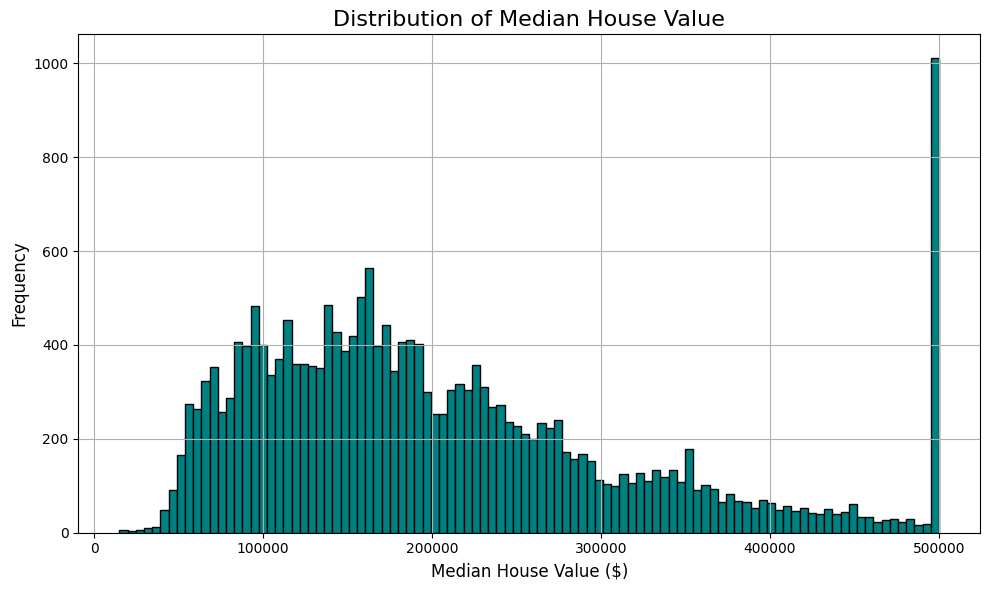

In [21]:
# Create the histogram

plt.figure(figsize=(10, 6))
plt.hist(df['median_house_value'], bins=100, color='teal', edgecolor='black')
plt.title('Distribution of Median House Value', fontsize=16)
plt.xlabel('Median House Value ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

2. Check out what variables correlates the most with "median house value"

In [22]:
# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Get correlation with median_house_value
correlations = correlation_matrix['median_house_value'].sort_values(ascending=False)

# Display top correlated features
print("🔍 Correlations with 'median_house_value':\n")
print(correlations)


🔍 Correlations with 'median_house_value':

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


3. Let's check out the distribution of the column that has the highest correlation to "median house value". Visualize your results with 100 bins.

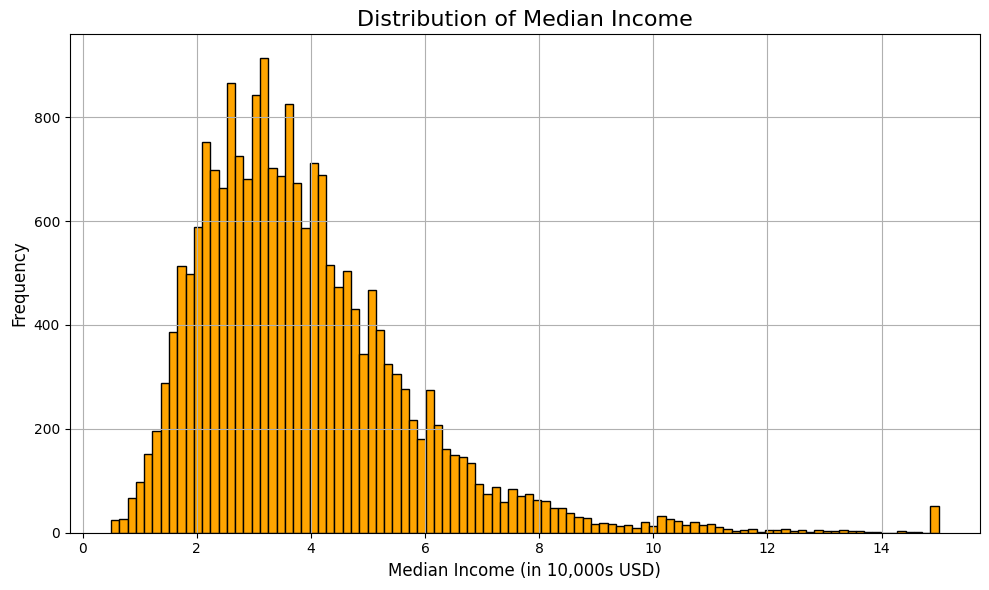

In [23]:
# Plot distribution of 'median_income'
plt.figure(figsize=(10, 6))
plt.hist(df['median_income'], bins=100, color='orange', edgecolor='black')
plt.title('Distribution of Median Income', fontsize=16)
plt.xlabel('Median Income (in 10,000s USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

4. Visualize the "median house value" and "median income" in a jointplot (kind="reg"). What do you see?

C:\Users\User\AppData\Local\Temp\ipykernel_9564\3770760088.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


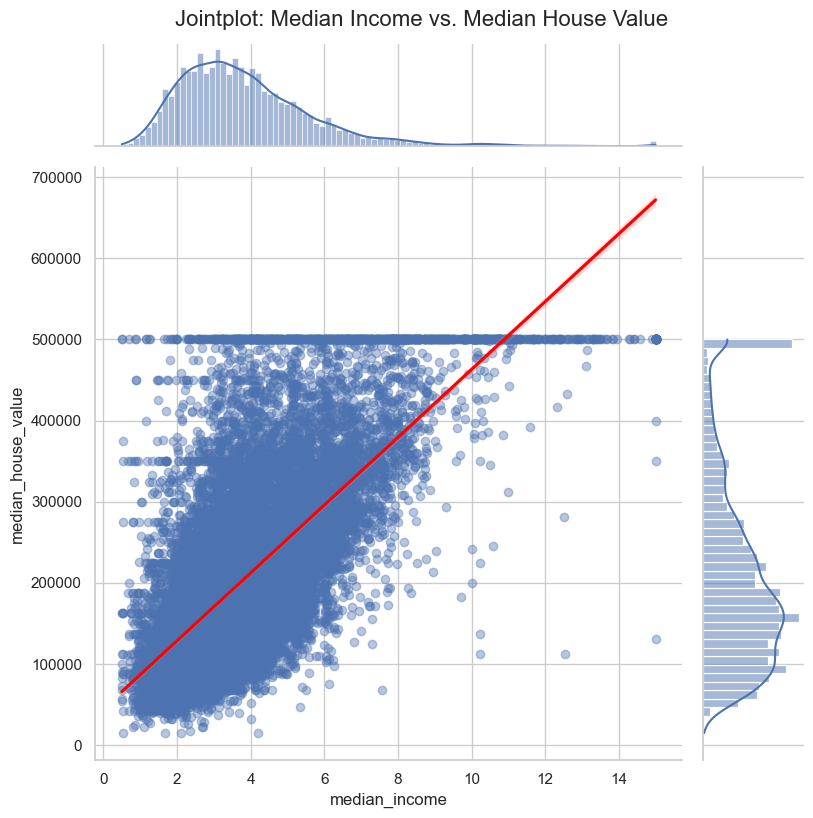

In [35]:
# Create jointplot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean data

df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

sns.set(style="whitegrid")
sns.jointplot(
    data=df,
    x='median_income',
    y='median_house_value',
    kind='reg',
    height=8,
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)

plt.suptitle("Jointplot: Median Income vs. Median House Value", fontsize=16, y=1.02)
plt.show()

5. Make the same visualization as in the above, but, cahnge the kind parameter to "kde". What extra information does this type of visualization convey, that the one in the above does not?

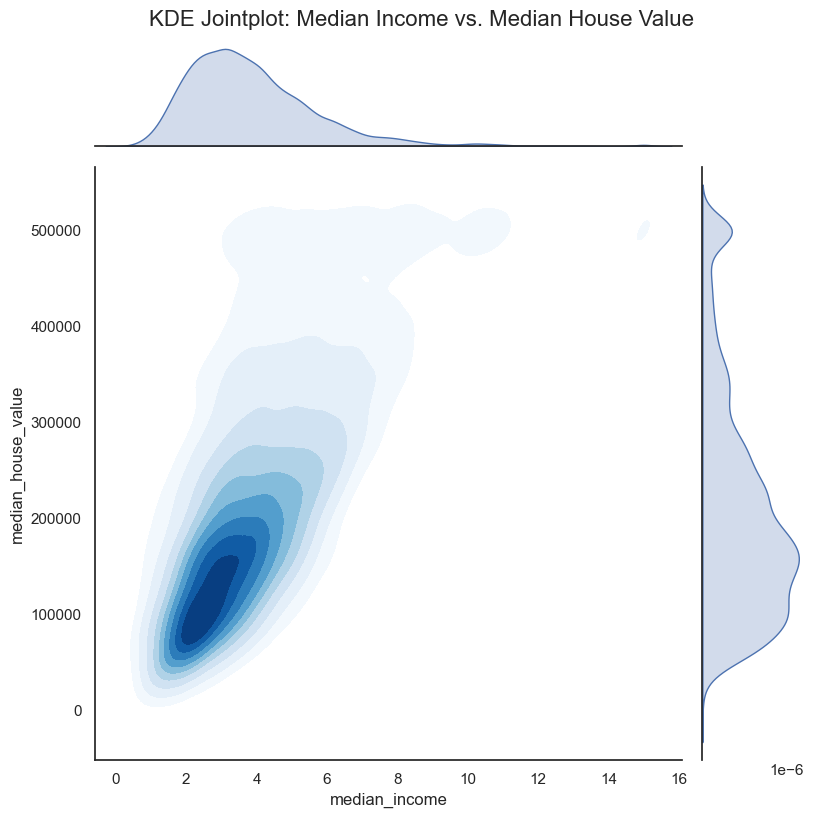

In [36]:
# KDE jointplot

sns.set(style="white")
sns.jointplot(
    data=df,
    x='median_income',
    y='median_house_value',
    kind='kde',
    fill=True,
    height=8,
    cmap='Blues'
)

plt.suptitle("KDE Jointplot: Median Income vs. Median House Value", fontsize=16, y=1.02)
plt.show()

#### Let's get schwifty with some EDA

1. Create a new categorical column from the "median income" with the following quartiles `[0, 0.25, 0.5, 0.75, 0.95, 1]` and label them like this `["Low", "Below_Average", "Above_Average", "High", "Very High"]` and name the column "income_cat"

In [37]:
# Define quantile bins and labels

quantiles = [0, 0.25, 0.5, 0.75, 0.95, 1.0]

labels = ["Low", "Below_Average", "Above_Average", "High", "Very High"]

# Use pandas qcut to create the new categorical column
df['income_cat'] = pd.qcut(df['median_income'], q=quantiles, labels=labels)

# Preview the result
print("✅ New 'income_cat' column created. Distribution:")
print(df['income_cat'].value_counts())
print("\nSample rows:")
print(df[['median_income', 'income_cat']].head())

✅ New 'income_cat' column created. Distribution:
income_cat
Low              5160
Below_Average    5160
Above_Average    5160
High             4128
Very High        1032
Name: count, dtype: int64

Sample rows:
   median_income     income_cat
0         8.3252      Very High
1         8.3014      Very High
2         7.2574           High
3         5.6431           High
4         3.8462  Above_Average


2. Using the Seaborn library, plot the count of your new column and set the `hue` to "ocean_proximity". What interesting things can you see?

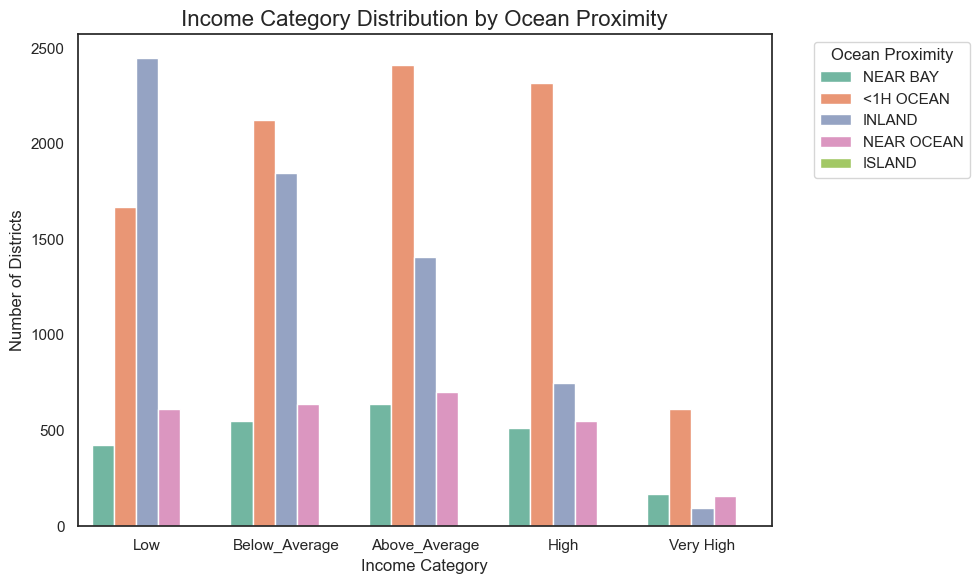

In [38]:
# Plot countplot

plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='income_cat', hue='ocean_proximity', palette='Set2')

plt.title("Income Category Distribution by Ocean Proximity", fontsize=16)
plt.xlabel("Income Category")
plt.ylabel("Number of Districts")
plt.legend(title="Ocean Proximity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

3. Create two barplots where you set "y="median_house_value" on both, and the x is first "income cat" and then "ocean_proximity". How does these two graphs complement what you saw in the graph in your previous question?

C:\Users\User\AppData\Local\Temp\ipykernel_9564\609226626.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='income_cat', y='median_house_value', palette='Blues')


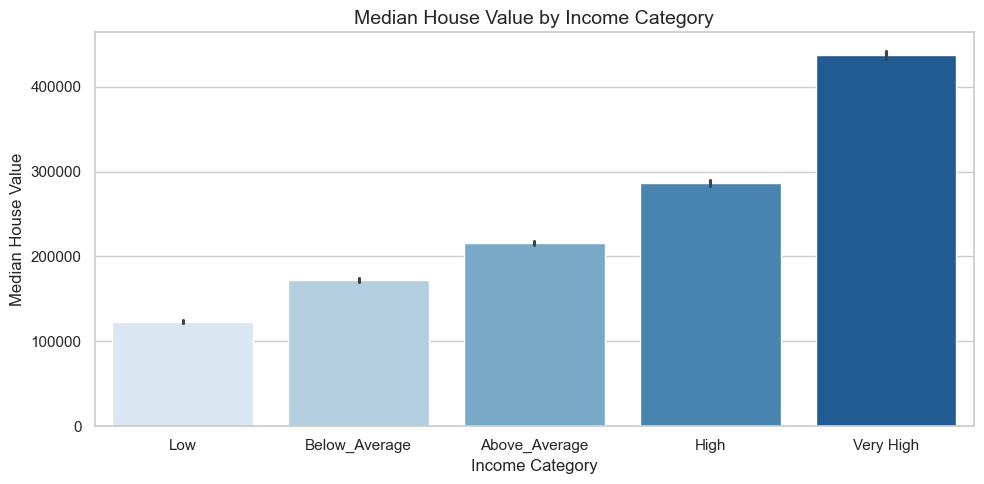

In [39]:
# Set Seaborn style
sns.set(style="whitegrid")

# Plot 1: Median house value by income category
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='income_cat', y='median_house_value', palette='Blues')
plt.title('Median House Value by Income Category', fontsize=14)
plt.xlabel('Income Category')
plt.ylabel('Median House Value')
plt.tight_layout()
plt.show()



C:\Users\User\AppData\Local\Temp\ipykernel_9564\354052613.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='ocean_proximity', y='median_house_value', palette='Greens')


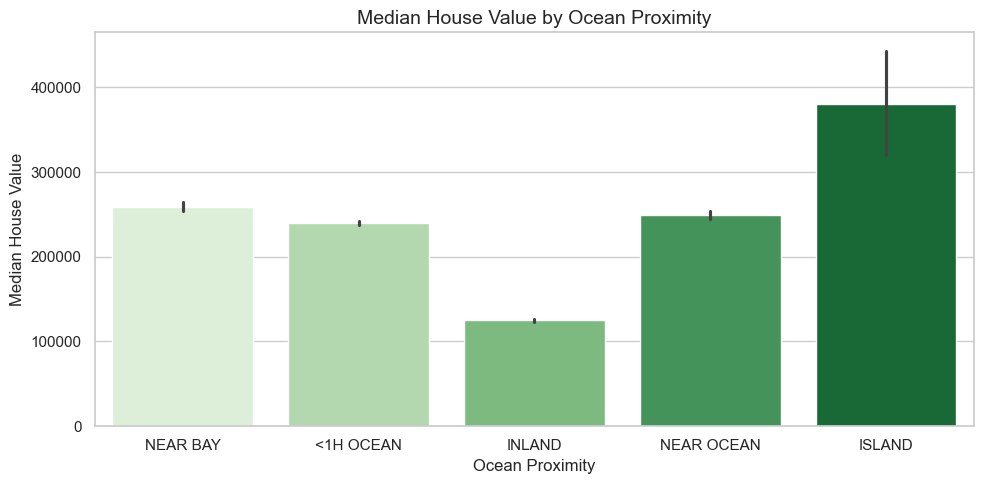

In [40]:
# Plot 2: Median house value by ocean proximity
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='ocean_proximity', y='median_house_value', palette='Greens')
plt.title('Median House Value by Ocean Proximity', fontsize=14)
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.tight_layout()
plt.show()

4. Create a pivoted dataframe where you have the values of the "income cat" column as indices and the values of the "ocean_proximity" column as columns. Also drop the "ISLAND" column that you'll get.

In [41]:
# Create pivot table: counts of rows for each income_cat and ocean_proximity
pivot_df = df.pivot_table(
    index='income_cat',
    columns='ocean_proximity',
    aggfunc='size',
    fill_value=0
)

# Drop the 'ISLAND' column
if 'ISLAND' in pivot_df.columns:
    pivot_df = pivot_df.drop(columns='ISLAND')



C:\Users\User\AppData\Local\Temp\ipykernel_9564\4283934745.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df.pivot_table(


In [42]:
# Display the pivoted DataFrame
print("✅ Pivoted DataFrame (District Count by Income Category and Ocean Proximity):")
print(pivot_df)

✅ Pivoted DataFrame (District Count by Income Category and Ocean Proximity):
ocean_proximity  <1H OCEAN  INLAND  NEAR BAY  NEAR OCEAN
income_cat                                              
Low                   1669    2450       426         614
Below_Average         2125    1847       548         636
Above_Average         2412    1409       637         702
High                  2318     749       514         547
Very High              612      96       165         159


5. Turn your pivoted dataframe into a heatmap. The heatmap should have annotations in integer format.

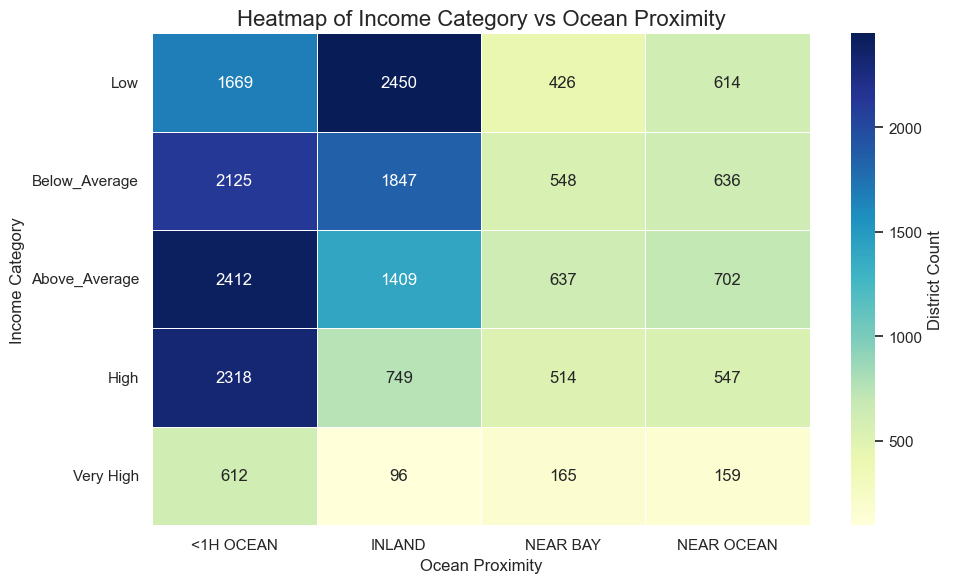

In [43]:
# Plot heatmap with integer annotations

plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_df,
    annot=True,
    fmt='d',  # integer format
    cmap='YlGnBu',
    linewidths=0.5,
    cbar_kws={"label": "District Count"}
)
plt.title('Heatmap of Income Category vs Ocean Proximity', fontsize=16)
plt.xlabel('Ocean Proximity')
plt.ylabel('Income Category')
plt.tight_layout()
plt.show()

# Part 3 - Preparing your Data



#### Splitting, Preparing and Engineering some Features

1. Let's drop the "income_cat" column as it has served its purpose already. We don't need for our model as we already have "median income".
Not dropping "incom cat" will lead to multicolinearity.

In [44]:
# Drop the income_cat column
df.drop(columns='income_cat', inplace=True)

# Confirm removal
print("✅ 'income_cat' column dropped.")
print("📋 Current DataFrame columns:")
print(df.columns)

✅ 'income_cat' column dropped.
📋 Current DataFrame columns:
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


2. Select your floating point columns and standardize your data by calculating the Z-score. You can apply the `stats.zscore()` method in a lambda function. Save your results to a variable called `z_scored`. 

In [45]:
import scipy.stats as stats

In [46]:
# Select float columns only
float_cols = df.select_dtypes(include='float64').columns

# Apply Z-score standardization using a lambda function
z_scored = df[float_cols].apply(lambda col: stats.zscore(col, nan_policy='omit'))

# Display preview of standardized data
print("✅ Z-scored DataFrame (first 5 rows):")
print(z_scored.head())

✅ Z-scored DataFrame (first 5 rows):
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327835  1.052548            0.982143    -0.804819       -0.972476   
1  -1.322844  1.043185           -0.607019     2.045890        1.357143   
2  -1.332827  1.038503            1.856182    -0.535746       -0.827024   
3  -1.337818  1.038503            1.856182    -0.624215       -0.719723   
4  -1.337818  1.038503            1.856182    -0.462404       -0.612423   

   population  households  median_income  median_house_value  
0   -0.974429   -0.977033       2.344766            2.129631  
1    0.861439    1.669961       2.332238            1.314156  
2   -0.820777   -0.843637       1.782699            1.258693  
3   -0.766028   -0.733781       0.932968            1.165100  
4   -0.759847   -0.629157      -0.012881            1.172900  


3. Turn the only categorical columns into dummies. Be vary of the dummy trap, to avoid multicolinearity.

In [ ]:
# Create dummy variables for 'ocean_proximity', avoiding the dummy trap
ocean_dummies = pd.get_dummies(df['ocean_proximity'], prefix='ocean', drop_first=True)

# Drop the original categorical column and join dummies
df_encoded = pd.concat([df.drop(columns='ocean_proximity'), ocean_dummies], axis=1)

# Preview the result
print("✅ Encoded DataFrame columns:")
print(df_encoded.columns)
print("\n🔍 Preview of encoded data:")
print(df_encoded.head())

✅ Encoded DataFrame columns:
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_INLAND', 'ocean_ISLAND', 'ocean_NEAR BAY',
       'ocean_NEAR OCEAN'],
      dtype='object')

🔍 Preview of encoded data:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  ocean_INLAND  \
0       322.0       126.0         8.3252            452600.0         False   
1      2401.0      1138.0         8.3014            358500.0        

4. Save our predicting variable to `y`.

In [48]:
# ✅ Save the target variable
y = df_encoded['median_house_value']

# Optional: Drop it from the features later when creating X
print("✅ Target variable 'y' has been created.")
print("📈 Preview:")
print(y.head())

✅ Target variable 'y' has been created.
📈 Preview:
0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


5. Concatenate `z_scored` and `dummies` and drop the predicting variable. Save to the varible `X`.

In [51]:
import scipy.stats as stats

# Select float columns only
float_cols = df.select_dtypes(include='float64').columns

# Apply Z-score standardization using a lambda function
z_scored = df[float_cols].apply(lambda col: stats.zscore(col, nan_policy='omit'))

# Display preview of standardized data
print("✅ Z-scored DataFrame (first 5 rows):")
print(z_scored.head())



✅ Z-scored DataFrame (first 5 rows):
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327835  1.052548            0.982143    -0.804819       -0.972476   
1  -1.322844  1.043185           -0.607019     2.045890        1.357143   
2  -1.332827  1.038503            1.856182    -0.535746       -0.827024   
3  -1.337818  1.038503            1.856182    -0.624215       -0.719723   
4  -1.337818  1.038503            1.856182    -0.462404       -0.612423   

   population  households  median_income  median_house_value  
0   -0.974429   -0.977033       2.344766            2.129631  
1    0.861439    1.669961       2.332238            1.314156  
2   -0.820777   -0.843637       1.782699            1.258693  
3   -0.766028   -0.733781       0.932968            1.165100  
4   -0.759847   -0.629157      -0.012881            1.172900  


# Part 4 - Machine Learning 




#### Train, Test, Split

1. Import `train_test_split` and split your data accordingly. Choose an appropriate test size.

In [53]:
# Define features (X) and target (y)
from sklearn.model_selection import train_test_split

X = df.drop(columns=['median_house_value', 'ocean_proximity'])  # drop target and non-numeric
y = df['median_house_value']  # target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # 80/20 split
)

# Confirm shapes
print("✅ Data successfully split!")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

✅ Data successfully split!
Training samples: 16512
Testing samples: 4128


#### Building and Training our Model

2. Build, fit and train a `LinearRegression` model. 

In [ ]:
import pandas as pd
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create target variable y
y = df['median_house_value']

# Create standardized features (Z-score) for float columns
float_cols = df.select_dtypes(include='float64').columns
z_scored = df[float_cols].apply(lambda col: stats.zscore(col, nan_policy='omit'))

# Encode 'ocean_proximity' and avoid dummy trap
dummies = pd.get_dummies(df['ocean_proximity'], prefix='ocean', drop_first=True)

# Combine standardized numerical features and dummies, drop target from features
X = pd.concat([z_scored.drop(columns='median_house_value'), dummies], axis=1)

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
# ✅ Build and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model training complete.")
print(f"📈 Model coefficients: {model.coef_}")
print(f"📏 Intercept: {model.intercept_:.2f}")

✅ Model training complete.
📈 Model coefficients: [-53770.0294899  -54397.86979448  13871.2778323  -13136.29036175
  43107.99324277 -43228.32336955  18448.01613063  74991.69860632
 -39786.65616133 136125.07261542  -5136.64221748   3431.14007315]
📏 Intercept: 219368.68


3. In a scatterplot, visualize the y_train on your x-axis and your predictions on the y-axis. How does your training predictions look? 

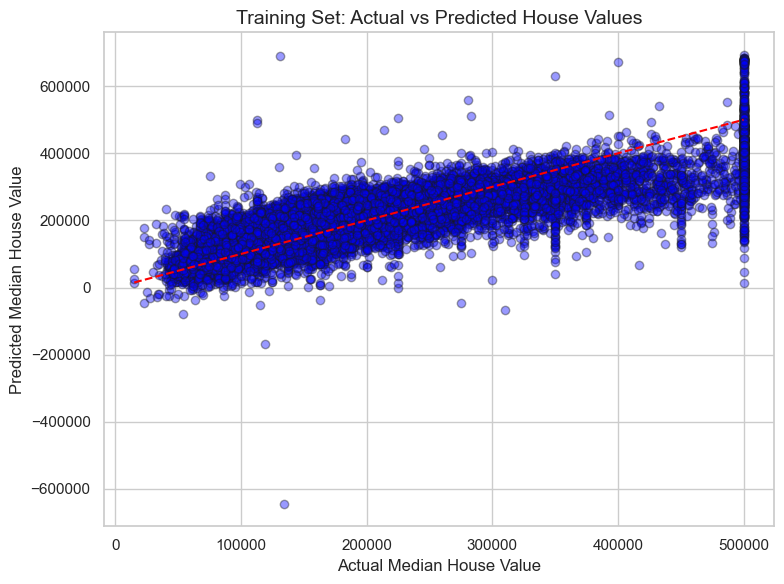

In [57]:
# Predict on the training set

y_train_pred = model.predict(X_train)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, alpha=0.4, color='blue', edgecolor='k')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.title("Training Set: Actual vs Predicted House Values", fontsize=14)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.grid(True)
plt.tight_layout()
plt.show()

The scatterplot shows that most predicted house values closely follow the red diagonal line, indicating the model performs well on the training data. However, there's some visible spread, especially at higher price ranges—suggesting the model may underperform on extreme or capped values.

4. From the sklearn metrics module, print the mean_squared_error and R^2-score. What does the metrics tell us?

In [59]:
from sklearn import metrics

# Predict on the training set
y_train_pred = model.predict(X_train)

# Calculate Mean Squared Error and R²
mse = metrics.mean_squared_error(y_train, y_train_pred)
r2 = metrics.r2_score(y_train, y_train_pred)



In [60]:
# Print metrics
print("✅ Training Performance Metrics:")
print(f"📉 Mean Squared Error (MSE): {mse:.2f}")
print(f"📈 R² Score: {r2:.4f}")


✅ Training Performance Metrics:
📉 Mean Squared Error (MSE): 4683203783.50
📈 R² Score: 0.6497


Good models in real estate often have R² between 0.6–0.8, but it depends on data quality.

#### Final Predictions

1. Now you are ready to make prediction on the test data. Do that and visualize your results in a new scatterplot.

In [61]:
# Predict on the test set
y_test_pred = model.predict(X_test)



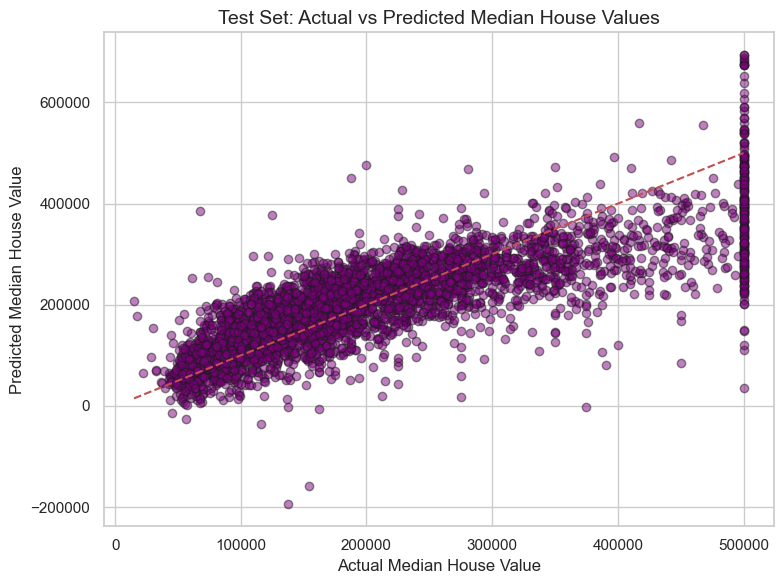

In [62]:
# Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='purple', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Test Set: Actual vs Predicted Median House Values", fontsize=14)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.grid(True)
plt.tight_layout()
plt.show()

2. Print the mean_squared_error and R^2-score again. What has happened?

In [63]:
# Calculate MSE and R² on test set
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)


In [64]:
# Print test performance
print("📊 Test Set Performance Metrics:")
print(f"📉 Mean Squared Error (MSE): {mse_test:.2f}")
print(f"📈 R² Score: {r2_test:.4f}")

📊 Test Set Performance Metrics:
📉 Mean Squared Error (MSE): 4908476721.16
📈 R² Score: 0.6254


MSE Error has increased with unseen data (test data), while the R.sqd drops when generalizing.

3. There is another metric called Root mean squared error, Which is the square root of the MSE. Calculate the RMSE.

In [ ]:
# Step 1: Calculate Mean Squared Error (MSE)

mse = metrics.mean_squared_error(y_test, y_test_pred)

# Step 2: Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Step 3: Print the RMSE
print("📊 Root Mean Squared Error (RMSE):")
print(f"✅ RMSE: {rmse:.2f}")

📊 Root Mean Squared Error (RMSE):
✅ RMSE: 70060.52


# Bonus Questions 1

1. Create a dataframe with two columns, one consisting of the y_test and one of your model's predictions.

In [66]:
# Create DataFrame for comparison

results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_test_pred
})

# Display the first few rows
print("✅ Actual vs Predicted DataFrame:")
print(results_df.head())

✅ Actual vs Predicted DataFrame:
     Actual      Predicted
0   47700.0   54055.448899
1   45800.0  124225.338937
2  500001.0  255489.379492
3  218600.0  268002.431569
4  278000.0  262769.434816


2. Make a series of of your new dataframe, by calculating the predicted error in absolut numbers. Save this series to variable name `absolute_errors`.

In [67]:
# Calculate absolute error for each prediction

absolute_errors = (results_df['Actual'] - results_df['Predicted']).abs()

# Preview the result
print("✅ Absolute Errors (first 5):")
print(absolute_errors.head())

✅ Absolute Errors (first 5):
0      6355.448899
1     78425.338937
2    244511.620508
3     49402.431569
4     15230.565184
dtype: float64


3. If you take the mean of your series, you will get the mean absolute errors, which is another metric for Linear Regressions.

In [69]:
# Display the result

mae = absolute_errors.mean()
print("📊 Mean Absolute Error (MAE):")
print(f"✅ MAE: {mae:.2f}")

📊 Mean Absolute Error (MAE):
✅ MAE: 50670.74


# Bonus Question 2 - Build a Random Forest Regressor

1. Build, fit and train a `RandomForestRegressor` model. Do this by following the same staps that you followed when building your `LinearRegression`.

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Separate target and features
y = df['median_house_value']

# Z-score standardize float columns
float_cols = df.select_dtypes(include='float64').columns
z_scored = df[float_cols].apply(lambda col: stats.zscore(col, nan_policy='omit'))



In [71]:
# Encode categorical column (avoid dummy trap)
dummies = pd.get_dummies(df['ocean_proximity'], prefix='ocean', drop_first=True)

# Combine features and drop target column
X = pd.concat([z_scored.drop(columns='median_house_value'), dummies], axis=1)



In [ ]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Initialize and train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("✅ Random Forest model training complete.")

✅ Random Forest model training complete.


2. Make prediction on the test data and evaluate you results.

In [74]:
# Step 1: Make predictions on the test data
y_pred = model.predict(X_test)



In [77]:

from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)



In [78]:
# Step 3: Print results
print("📊 Model Evaluation on Test Data:")
print(f"✅ R² Score: {r2:.4f}")
print(f"📉 Mean Squared Error (MSE): {mse:.2f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.2f}")

📊 Model Evaluation on Test Data:
✅ R² Score: 0.6254
📉 Mean Squared Error (MSE): 4908476721.16
📉 Root Mean Squared Error (RMSE): 70060.52


R² Score is close to 1 → better fit (explains more variance)

RMSE in dollars indicates that is an average prediction error

RMSE is compared to the range of house prices (e.g., $100K–$500K) to judge performance